In [52]:
import json
import sys
import matplotlib.pyplot as plt
file = open("data/5-4-2019-Olympus-FAR-trim.txt")

#this converts heiarchical data into a flattened dict
def flatten(data, prefix=""):
    flat = dict()
    
    if isinstance(data,dict):
        if prefix:
            prefix += "."
        for k,v in data.items():
            flat.update(flatten(v, prefix + str(k)))
        return flat;
    
    if isinstance(data,list):
        if prefix:
            prefix += "."
        i = 0;
        for v in data:
            flat.update(flatten(v, prefix + str(i)))
            i += 1
        return flat
    
    return {prefix:data}



frames = []
for line in file:
    try:
        data = json.loads(line)
        if data["id"] == "sensor":
            try:
                
                flat = flatten(data)
                flat["id"] = 0.0 #Need to handle enumerated states!
                flt = dict()
                
                for key in flat:
                    flt[key] = float(flat[key])
                
                frames += [flt]
                
            except KeyError:
                print('keyError')
                print(line)
    except ValueError:
        print('line not JSON')
file.close()

line not JSON
line not JSON
line not JSON


In [53]:
#convert time to ms
for frame in frames:
    frame["tick"] = frame["tick"]/1000

#these are the keys of the sensor data
keys = list(frames[0].keys())
#this is the data in a dict of time series
series = {keys[i]: [data[keys[i]] for data in frames] for i in range(len(keys))}
#this is the data in a time series of dicts

<IPython.core.display.Javascript object>


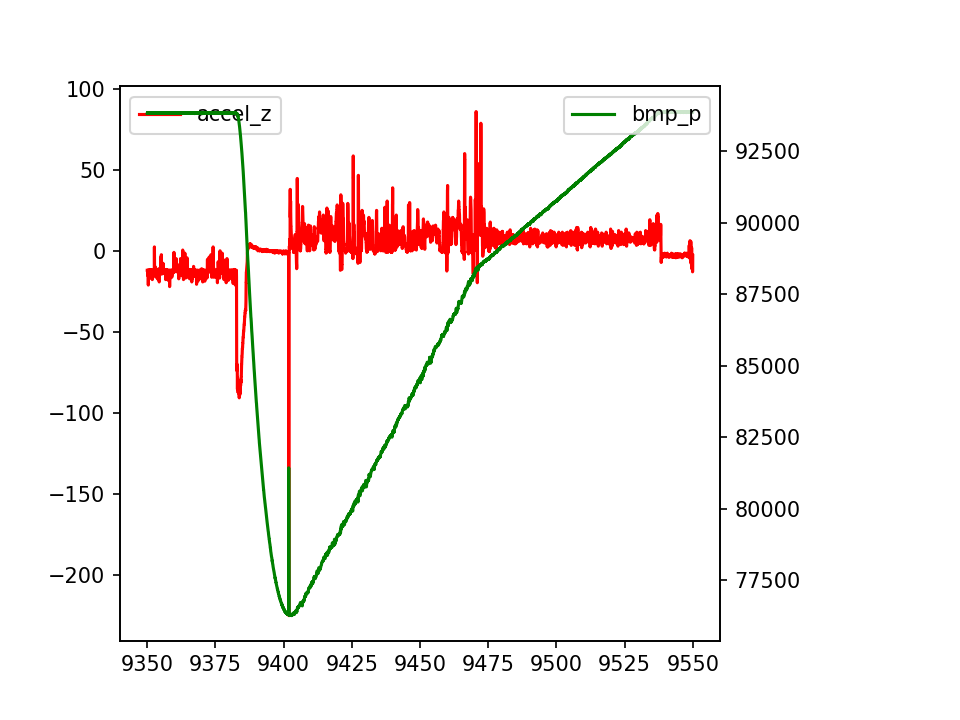

In [57]:
###TIME TO PLOT###
%matplotlib notebook 

#Set up three Y axes
fig, ax1 = plt.subplots()
fig.subplots_adjust(right=0.75)
ax2 = ax1.twinx()
#ax3 = ax1.twinx()
#ax3.spines["right"].set_position(("axes", 1.2))

# #Olympus Launch
# ax1.plot(series['tick'],series['adxl.a.0'],color="red",label='accel_x')
# ax1.plot(series['tick'],series['adxl.a.1'],color="blue",label='accel_y')
ax1.plot(series['tick'],series['adxl.a.2'],color="red",label='accel_z')
ax2.plot(series['tick'],series['bmp.p'],color="green",label='bmp_p')

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
#ax3.legend(loc="lower right")


In [58]:
sim = [series['tick'],series['adxl.a.2'],series['bmp.p']]

new = [[],[],[]]

for j in range(len(sim)):
    for i in range(len(sim[j])):
        new[j].append(sim[j][i])
        if(i+1 < len(sim[j])):
            new[j].append((sim[j][i]+sim[j][i+1])/2)

<IPython.core.display.Javascript object>


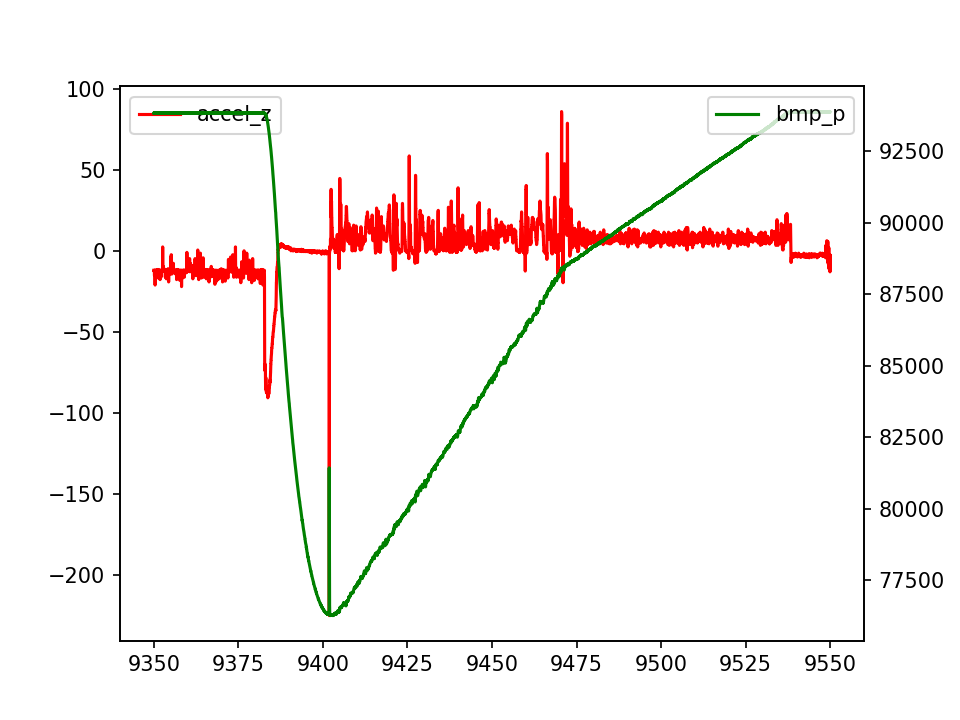

In [60]:
#Set up three Y axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#Olympus Launch
ax1.plot(new[0],new[1],color="red",label='accel_z')
ax2.plot(new[0],new[2],color="green",label='bmp_p')

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

with open("shitl.txt", "w") as f:
    for i in range(len(new[0])):
        data = {'id':'sensor','tick':int(new[0][i]*1000),'adxl':{'a':[0,0,round(new[1][i],4)]},'bmp':{'p':round(new[2][i],4)}}
        f.write(json.dumps(data,separators=(',', ':'))+'\n')